  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434     79323                   PINK CHERRY LIGHTS        12   
2  489434     79323                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

        InvoiceDate  Price  Customer ID         Country  
0  01-12-2009 07:45   6.95      13085.0  United Kingdom  
1  01-12-2009 07:45   6.75      13085.0  United Kingdom  
2  01-12-2009 07:45   6.75      13085.0  United Kingdom  
3  01-12-2009 07:45   2.10      13085.0  United Kingdom  
4  01-12-2009 07:45   1.25      13085.0  United Kingdom  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


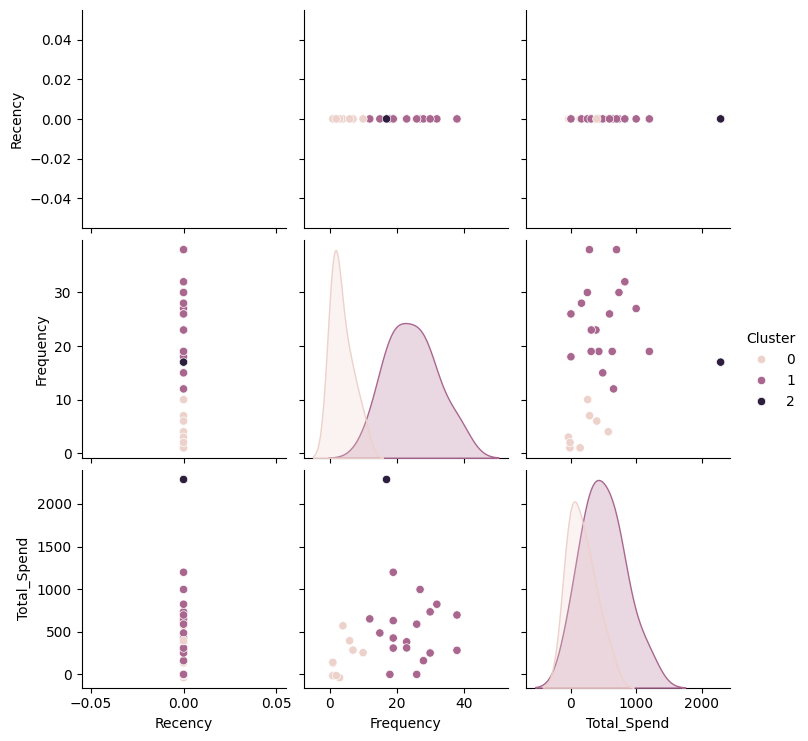

         Recency  Frequency  Total_Spend
Cluster                                 
0            0.0   3.600000      169.679
1            0.0  24.555556      495.895
2            0.0  17.000000     2286.240


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/onlineretail.csv')

print(df.head())

df = df.rename(columns={'Customer ID': 'CustomerID', 'InvoiceDate': 'InvoiceDate','Invoice':'InvoiceNo' })

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Total_Spend'] = df['Quantity'] * df['Price']

customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Spend': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'})

customer_df.dropna(inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df)

kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.pairplot(customer_df, hue='Cluster')
plt.show()

cluster_summary = customer_df.groupby('Cluster').mean()
print(cluster_summary)
